In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns

In [2]:
# 데이터셋 로드
data = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

In [3]:
# 데이터셋 확인
data.head()

name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [5]:
# null이 있는지 확인
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [6]:
# 필요없는 name 칼럼 삭제
data.drop('name', axis=1, inplace=True)

In [7]:
# year 칼럼을 차량 나이로 변경
data['age'] = date.today().year - data['year']
data.drop('year', axis=1, inplace=True)

In [8]:
data.head()

selling_price  km_driven    fuel seller_type transmission         owner  \
0          60000      70000  Petrol  Individual       Manual   First Owner   
1         135000      50000  Petrol  Individual       Manual   First Owner   
2         600000     100000  Diesel  Individual       Manual   First Owner   
3         250000      46000  Petrol  Individual       Manual   First Owner   
4         450000     141000  Diesel  Individual       Manual  Second Owner   

   age  
0   15  
1   15  
2   10  
3    5  
4    8

In [9]:
data['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

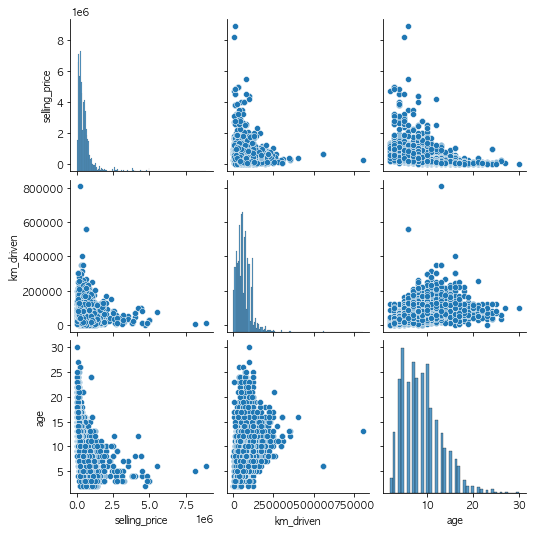

In [10]:
# 데이터 분포 확인
sns.pairplot(data)

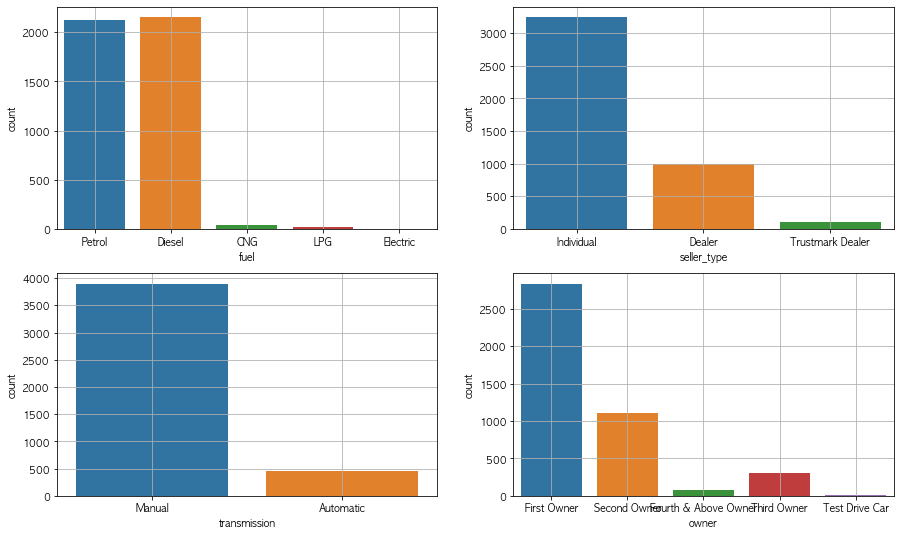

In [18]:
fig = plt.figure(figsize=(15, 9))

plt.subplot(2, 2, 1)
sns.countplot(x="fuel", data=data)
plt.grid(True)

plt.subplot(2, 2, 2)
sns.countplot(x="seller_type", data=data)
plt.grid(True)

plt.subplot(2, 2, 3)
sns.countplot(x="transmission", data=data)
plt.grid(True)

plt.subplot(2, 2, 4)
sns.countplot (x="owner", data=data)
plt.grid(True)


plt.show()

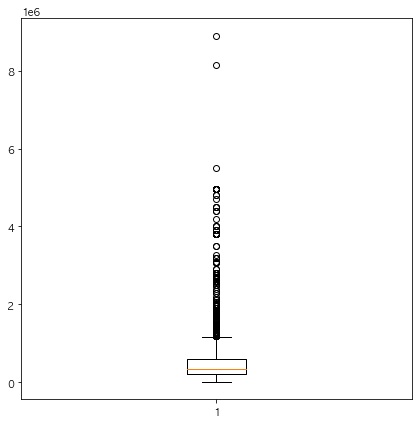

In [5]:
plt.figure(figsize=(7,7))
plt.boxplot(data['selling_price'])
plt.show()

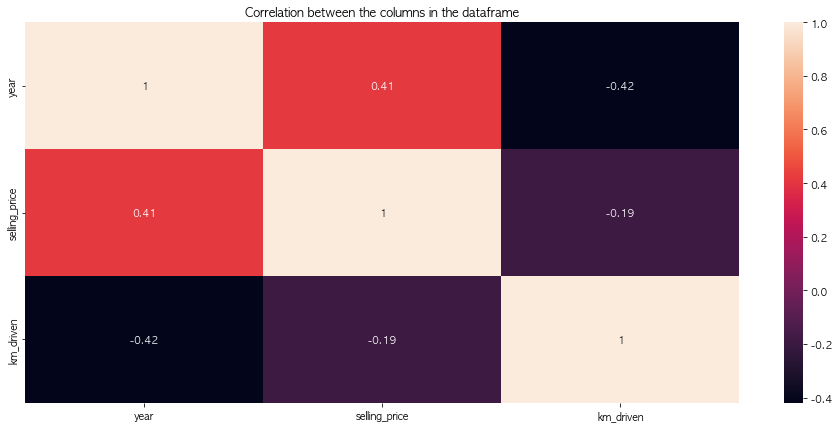

In [20]:
plt.figure(figsize = (16,7))
sns.heatmap(data.corr(), annot = True)
plt.title('Correlation between the columns in the dataframe')
plt.show()

In [11]:
# dummie로 one-hot-encoding(object타입인 seller_type, trainsmission, owner 컬럼만 encoding처리)
df = pd.get_dummies(data, drop_first=True)

In [12]:
df.head()

selling_price  km_driven  age  fuel_Diesel  fuel_Electric  fuel_LPG  \
0          60000      70000   15            0              0         0   
1         135000      50000   15            0              0         0   
2         600000     100000   10            1              0         0   
3         250000      46000    5            0              0         0   
4         450000     141000    8            1              0         0   

   fuel_Petrol  seller_type_Individual  seller_type_Trustmark Dealer  \
0            1                       1                             0   
1            1                       1                             0   
2            0                       1                             0   
3            1                       1                             0   
4            0                       1                             0   

   transmission_Manual  owner_Fourth & Above Owner  owner_Second Owner  \
0                    1                           0                   0   
1                    1                           0                   0   
2                    1                           0                   0   
3                    1                           0                   0   
4                    1                           0                   1   

   owner_Test Drive Car  owner_Third Owner  
0                     0                  0  
1                     0                  0  
2                     0                  0  
3                     0                  0  
4                     0                  0

In [13]:
# Feature와 Target 분리
X = df.drop('selling_price', axis=1)
y = df['selling_price']

In [14]:
X.shape, y.shape

((4340, 13), (4340,))

In [15]:
# train set test set 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1207)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1207)

In [16]:
# RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [32]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)


{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [18]:
# 학습할 모델
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [26]:
# RandomizedSearch
rf_random=RandomizedSearchCV(estimator= rf , param_distributions=random_grid,
                             scoring='neg_mean_squared_error',n_iter= 50, cv= 5, verbose=2,random_state=42,n_jobs=-1)

In [27]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [28]:
# RandomizedSearch 최적의 하이퍼 파라미터
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15}

In [29]:
rf_random.best_score_

-139039829406.29102

In [30]:
best_model = rf_random.best_estimator_
best_model

RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=1000)

In [31]:
from metrics import print_regression_metrics
print_regression_metrics(y_test, best_model.predict(X_test))

MSE:83673112705.5399, RMSE:289263.05105481396, R Square:0.7526314259108846


In [35]:
# Grid Search
rf_grid=GridSearchCV(estimator= rf , param_grid=random_grid,
                             scoring='neg_mean_squared_error', cv= 5, verbose=2,n_jobs=-1)

In [36]:
# rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 2880 candidates, totalling 14400 fits


/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=600; total time=   1.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=800; total time=   0.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   1.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=10, max_feat

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=800; total time=   0.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1000; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_featu

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=600; total time=   1.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=800; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1000; total time=   1.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_fea

[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=600; total time=   1.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=800; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1000; total time=   1.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=5, max_feature

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.7s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.7s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100; total time=   0.2s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1000; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_featur

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=200; total time=   0.2s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=200; total time=   0.2s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.7s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.8s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100; total time=   0.2s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100; total time=   0.2s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   1.3s
[CV] END max_depth=20, max_fe

[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=600; total time=   1.5s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100; total time=   0.2s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100; total time=   0.2s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   1.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_featu

[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=600; total time=   1.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=800; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1000; total time=   1.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=10, max_featur

[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   2.9s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   0.7s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=500; total time=   1.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=600; total time=   1.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=800; total time=   1.8s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=900; total time=   2.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1100; total time=   2.6s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=au

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=300; total time=   0.8s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=500; total time=   1.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=600; total time=   1.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=800; total time=   2.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=900; total time=   2.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   2.9s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=aut

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=600; total time=   1.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=700; total time=   1.9s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=900; total time=   2.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   2.9s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1200; total time=   3.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=400; total time=   1.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=600; total time=   1.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800; total time=   2.0s
[CV] END max_depth=5, max_features=

[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=500; total time=   1.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=600; total time=   1.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800; total time=   2.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1000; total time=   2.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1100; total time=   2.6s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, max_feature

[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1000; total time=   2.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1200; total time=   2.9s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=300; total time=   0.8s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=500; total time=   1.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   1.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=800; total time=   2.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=900; total time=   2.3s
[CV] END max_depth=5, max_features=a

[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=500; total time=   1.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=600; total time=   1.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800; total time=   2.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=900; total time=   2.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1100; total time=   2.6s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, max_features

[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=900; total time=   2.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1000; total time=   2.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1200; total time=   2.9s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=400; total time=   1.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=500; total time=   1.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=700; total time=   1.7s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=800; total time=   2.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1000; total time=   2.6s
[CV] END max_depth=5, max_features

[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1000; total time=   2.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1100; total time=   2.6s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=300; total time=   0.8s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=400; total time=   1.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   1.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=700; total time=   1.8s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=900; total time=   2.4s
[CV] END max_depth=5, max_features=a

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=200; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=200; total time=   0.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=300; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=500; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=600; total time=   2.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=800; total time=   2.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=900; total time=   3.5s
[CV] END max_depth=5, max_featur

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1200; total time=   3.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time=   1.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=700; total time=   1.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=800; total time=   2.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   2.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=   3.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=200; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=300; total time=   0.8s
[CV] END max_depth=5, max_features=sqr

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=500; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=700; total time=   1.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1000; total time=   2.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1200; total time=   3.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time=   1.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, mi

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=400; total time=   1.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=600; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=700; total time=   1.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=900; total time=   2.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   3.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1200; total time=   3.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=500; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=600; total time=   1.6s
[CV] END max_depth=5, max_features=s

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=   1.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=800; total time=   2.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1000; total time=   2.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1100; total time=   3.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, m

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=800; total time=   2.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   2.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=   2.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=200; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=200; total time=   0.6s
[CV] END max_depth=5, max_features=sqr

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=800; total time=   2.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   2.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1200; total time=   3.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=200; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=300; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=500; total time=   1.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=600; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=800; total time=   2.2s
[CV] END max_depth=5, max_features=sqr

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=900; total time=   2.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1100; total time=   2.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1200; total time=   3.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=400; total time=   1.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   1.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=800; total time=   2.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=900; total time=   2.4s
[CV] END max_depth=5, max_features

[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   3.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   4.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   5.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   7.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1100; total time=   7.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.3s
[CV] END max_depth=10, max_features

[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=600; total time=   3.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=800; total time=   4.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=900; total time=   4.9s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1100; total time=   6.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END max_depth=10, max_feat

[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=300; total time=   1.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=400; total time=   2.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=600; total time=   2.8s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=700; total time=   3.8s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=900; total time=   4.9s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1100; total time=   5.9s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1200; total time=   6.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   2.6s
[CV] END max_depth=10, m

[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   1.8s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   2.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500; total time=   3.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=700; total time=   4.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=800; total time=   5.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1000; total time=   7.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1200; total time=   6.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   1.1s
[CV] END max_depth=10, max_features=a

[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=600; total time=   3.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=800; total time=   4.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1000; total time=   5.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1100; total time=   6.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=300; total time=   2.1s
[CV] END max_depth=10, max_fea

[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500; total time=   3.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=700; total time=   4.8s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1000; total time=   7.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1200; total time=   6.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   1.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   2.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   3.2s
[CV] END max_depth=10, max_features

[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   2.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=   4.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=700; total time=   4.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=900; total time=   6.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1100; total time=   7.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1200; total time=   7.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   2.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=   4.1s
[CV] END max_depth=10, max_features=au

[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   2.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=   4.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=700; total time=   4.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1000; total time=   6.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1200; total time=   6.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   2.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time=   2.6s
[CV] END max_depth=10, max_features=

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1200; total time=   4.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=400; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=500; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=700; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=900; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=1000; total time=   3.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=1200; total time=   3.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   1.2s
[CV] END max_depth=10, m

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   3.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1100; total time=   3.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   1.5s
[CV] END max_depth=10, max_featur

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   2.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   3.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, max_fea

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   3.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   4.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=400; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=600; total time=   2.2s
[CV] END max_depth=10, max_fea

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1100; total time=   3.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=300; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=500; total time=   1.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=600; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=800; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=900; total time=   2.8s
[CV] END max_depth=10, m

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=400; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=600; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=800; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=900; total time=   3.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1100; total time=   3.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1200; total time=   4.3s
[CV] END max_depth=10, max_fea

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=700; total time=   2.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=900; total time=   3.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1000; total time=   3.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1200; total time=   4.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=400; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=600; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=700; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=900; total time=   3.0s
[CV] END max_depth=10, max

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=900; total time=   3.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1100; total time=   3.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.4s
[CV] END max_depth=10, max_features=sqr

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.1s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.1s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   1.7s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   2.9s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   3.5s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=   4.6s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   6.5s
[CV] END max_depth=15, max_feat

[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   2.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   3.4s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   4.1s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   5.1s
[CV] END max_depth=15, max_features=auto

[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   6.4s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   7.5s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   1.8s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=400; total time=   2.7s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=500; total time=   3.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   4.2s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=800; total time=   5.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1000; total time=   7.0s
[CV] END max_depth=15, max_fe

[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1100; total time=   6.4s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=100; total time=   0.4s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=100; total time=   0.5s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=100; total time=   0.5s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=200; total time=   0.9s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=200; total time=   1.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=300; total time=   1.3s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=400; total time=   1.8s
[CV] END max_depth=15, m

[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.4s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.9s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   2.8s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   3.3s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=   5.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   6.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   7.1s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   8.1s
[CV] END max_depth=15, max_features=au

[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   2.7s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   3.8s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=700; total time=   4.4s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=900; total time=   5.9s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   6.9s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   8.2s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   2.7s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   3.4s
[CV] END max_depth=15, max_features=au

[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   6.1s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.8s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   1.1s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   1.7s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=400; total time=   2.5s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=600; total time=   3.5s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=700; total time=   4.1s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=900; total time=   6.4s
[CV] END max_depth=15, max_fea

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=600; total time=   2.9s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=700; total time=   3.5s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=900; total time=   4.3s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   5.3s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=1200; total time=   5.6s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   2.1s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=600; total time=   2.5s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=800; total time=   3.2s
[CV] END max_depth=

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   2.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=   2.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   3.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   4.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=   4.4s
[CV] END max_depth=15, max_features=sq

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=900; total time=   3.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   3.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=   4.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   1.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   1.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=700; total time=   2.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=   2.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   3.4s
[CV] END max_depth=15, max_featu

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   2.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=   2.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   3.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1100; total time=   3.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   4.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   1.7s
[CV] END max_depth=15, max_features=s

[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=700; total time=   2.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   2.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   3.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1100; total time=   3.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   1.7s
[CV] END max_depth=15, max_features=sq

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=800; total time=   2.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=900; total time=   2.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=1100; total time=   3.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=1200; total time=   3.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   1.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   2.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   2.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=900; total time=   3.2s
[CV] END max_depth=15, max_fea

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=900; total time=   2.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=1000; total time=   3.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=1200; total time=   3.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   1.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   1.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   2.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=700; total time=   2.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=900; total time=   3.2s
[CV] END max_depth=15, max_featu

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   1.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=   2.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   3.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   3.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   4.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.0s
[CV] END max_depth=15, max_features=s

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=300; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=500; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=600; total time=   1.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=800; total time=   2.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=900; total time=   2.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1100; total time=   3.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=15, max_fe

[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=200; total time=   0.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=300; total time=   0.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=600; total time=   1.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=800; total time=   2.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=900; total time=   2.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=   2.9s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth

[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=500; total time=   1.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=700; total time=   2.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=900; total time=   2.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1000; total time=   2.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1200; total time=   3.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=300; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=400; total time=   1.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=600; total time=   1.7s
[CV] END max_depth=15,

[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=200; total time=   1.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   1.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=500; total time=   3.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=600; total time=   3.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=800; total time=   4.8s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=900; total time=   5.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1100; total time=   6.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=100; total time=   0.5s
[CV] END max_depth=20, max_fea

[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   3.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   3.9s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   5.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   6.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1100; total time=   7.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.3s
[CV] END max_depth=20, max_features

[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=400; total time=   1.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=500; total time=   2.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=700; total time=   2.9s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=800; total time=   3.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1000; total time=   4.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1200; total time=   5.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   1.9s
[CV] END max_depth=20, max

[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=200; total time=   0.9s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   1.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=400; total time=   1.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=500; total time=   2.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=700; total time=   3.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=800; total time=   3.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1000; total time=   4.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1100; total time=   4.6s
[CV] END max_depth=20,

[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   6.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1100; total time=   7.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.8s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   2.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   3.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   4.9s
[CV] END max_depth=20, max_features=au

[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=100; total time=   0.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=200; total time=   1.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=200; total time=   1.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=300; total time=   1.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=500; total time=   2.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=600; total time=   3.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=800; total time=   4.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1000; total time=   5.3s
[CV] END max_depth=20, max_feat

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1000; total time=   6.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   6.9s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=300; total time=   1.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=400; total time=   2.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=600; total time=   3.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   3.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=900; total time=   4.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1000; total time=   6.0s
[CV] END max_depth=20, max_fe

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=800; total time=   4.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1000; total time=   6.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1200; total time=   5.9s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=200; total time=   1.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=300; total time=   1.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=500; total time=   2.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=600; total time=   2.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=800; total time=   3.5s
[CV] END max_depth=20, ma

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   2.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   2.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=700; total time=   3.4s
[CV] END max_depth=20, max_features=sqrt

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   2.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   2.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   3.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=900; total time=   4.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1100; total time=   5.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_features=sqr

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=700; total time=   2.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   3.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   3.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   4.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   1.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=400; total time=   1.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=600; total time=   2.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   2.7s
[CV] END max_depth=20, max_fea

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   2.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=   3.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=900; total time=   4.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   4.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=   5.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   1.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   2.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=700; total time=   2.8s
[CV] END max_depth=20, max_features

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   2.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=700; total time=   2.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=900; total time=   3.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   4.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   4.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   1.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   2.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=   2.7s
[CV] END max_depth=20, max_features=sq

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=900; total time=   2.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1100; total time=   2.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1200; total time=   3.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=500; total time=   1.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=   2.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   2.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=900; total time=   3.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1100; total time=   3.8s
[CV] END max_depth=20, max_feat

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1200; total time=   4.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=400; total time=   1.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=500; total time=   1.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   2.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=900; total time=   2.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1000; total time=   3.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1200; total time=   3.7s
[CV] END max_depth=20,

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1200; total time=   4.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=500; total time=   1.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=700; total time=   2.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=800; total time=   2.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1000; total time=   3.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1100; total time=   3.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=200; total time=   0.8s
[CV] END max_depth=20,

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1100; total time=   4.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=300; total time=   1.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   1.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=500; total time=   1.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=700; total time=   2.5s
[CV] END max_depth=20, m

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=700; total time=   2.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=900; total time=   2.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1000; total time=   3.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   3.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=300; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=400; total time=   1.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=600; total time=   1.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   2.2s
[CV] END max_depth=20, max_fea

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=200; total time=   0.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=200; total time=   0.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=300; total time=   1.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   1.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=600; total time=   2.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=800; total time=   2.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=900; total time=   3.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=   3.4s
[CV] END max_de

[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   5.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=700; total time=   5.7s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=900; total time=   7.6s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1100; total time=   9.8s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=  11.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   3.8s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   4.4s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   5.9s
[CV] END max_depth=25, max_features=au

[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1100; total time=   7.5s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   8.2s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=500; total time=   3.4s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   4.6s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=800; total time=   5.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1000; total time=   6.5s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1100; total time=   6.9s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=200; total time=   0.9s
[CV] END max_depth=25, max_

[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   8.4s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=500; total time=   3.6s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=700; total time=   4.7s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=800; total time=   5.4s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1000; total time=   6.6s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1100; total time=   7.5s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=200; total time=   1.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=300; total time=   1.8s
[CV] END max_depth=25, max_

[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   2.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500; total time=   3.3s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=   3.6s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=800; total time=   4.8s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.3s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1100; total time=   6.5s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END max_depth=25, max_features=a

[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100; total time=   0.5s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=200; total time=   0.9s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=200; total time=   0.9s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   1.4s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=400; total time=   1.8s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=600; total time=   2.7s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800; total time=   3.6s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=900; total time=   4.1s
[CV] END max_depth=25, m

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=700; total time=   4.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=900; total time=   5.2s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1000; total time=   5.7s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1200; total time=   6.7s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=400; total time=   1.8s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=500; total time=   2.4s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   3.2s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800; total time=   3.6s
[CV] END max_depth=25, max

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1200; total time=   6.7s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=600; total time=   2.9s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   3.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=900; total time=   4.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1000; total time=   4.5s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1200; total time=   5.3s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=300; total time=   1.6s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=500; total time=   2.6s
[CV] END max_depth=25, m

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=800; total time=   5.2s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1000; total time=   7.2s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1200; total time=   7.2s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=300; total time=   2.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=400; total time=   1.9s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=500; total time=   2.4s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=700; total time=   3.3s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=900; total time=   4.4s
[CV] END max_depth=25,

[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=900; total time=   4.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   6.5s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=1200; total time=   7.3s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   2.4s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=700; total time=   2.9s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=800; total time=   3.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1000; total time=   4.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=   4.4s
[CV] END max_de

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.3s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   2.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=   3.2s
[CV] END max_depth=25, max_features=sqrt

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1100; total time=   4.2s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   1.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   1.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=   2.6s
[CV] END max_depth=25, max_features=sqr

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=700; total time=   2.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1100; total time=   3.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1200; total time=   3.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   1.2s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   1.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=700; total time=   2.3s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=900; total time=   2.8s
[CV] END max_depth=25, max_feature

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=300; total time=   0.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=400; total time=   1.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=600; total time=   1.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=800; total time=   2.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=900; total time=   2.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1100; total time=   3.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1200; total time=   3.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END max_depth=25, m

[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1200; total time=   3.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   1.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   1.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=700; total time=   2.2s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=900; total time=   2.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   3.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1200; total time=   3.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=400; total time=   1.2s
[CV] END max_depth=25, max_fea

[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   1.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   1.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   1.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=400; total time=   1.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=600; total time=   2.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=700; total time=   3.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=900; total time=   4.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1100; total time=   5.3s
[CV] END max_depth=30, max_feat

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=   3.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=100; total time=   0.3s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=200; total time=   0.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=300; total time=   0.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=400; total time=   1.2s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=600; total time=   1.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=700; total time=   2.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=900; total time=   2.9s
[CV] END max_depth=25, max_feat

[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   3.8s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1000; total time=   4.7s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1200; total time=   5.5s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   1.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500; total time=   2.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=700; total time=   3.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.1s
[CV] END max_depth=30, max_features=au

/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/don/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   1.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=800; total time=   2.2s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1000; total time=   2.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1200; total time=   3.2s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=300; total time=   0.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=500; total time=   1.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   2.1s
[CV] END max_depth=25, max

[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=300; total time=   0.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=400; total time=   1.2s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=500; total time=   1.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   2.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=900; total time=   2.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1000; total time=   3.3s
[CV] END max_depth=25, max_feat

[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   2.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   2.8s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   4.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   5.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=900; total time=   6.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1100; total time=  10.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   9.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   3.1s
[CV] END max_depth=30, max_features=au

[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1200; total time=   6.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   1.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=500; total time=   2.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=600; total time=   2.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=800; total time=   3.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=900; total time=   3.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1100; total time=   4.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=30, ma

[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=800; total time=   3.8s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=900; total time=   4.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1100; total time=   5.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=100; total time=   0.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=100; total time=   0.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=100; total time=   0.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=200; total time=   0.7s
[CV] END max_depth=30, max

[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   6.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=500; total time=   2.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=600; total time=   2.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=800; total time=   3.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1000; total time=   4.8s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1100; total time=   5.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=100; total time=   0.4s
[CV] END max_depth=30, max_

[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=800; total time=   2.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1000; total time=   3.8s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1100; total time=   4.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   1.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=500; total time=   2.4s
[CV] END max_depth=30, max_featu

[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1000; total time=   4.5s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   5.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=200; total time=   0.7s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   1.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=400; total time=   1.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=500; total time=   1.8s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   2.5s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800; total time=   3.0s
[CV] END max_depth=30, m

[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1200; total time=   5.5s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   1.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=400; total time=   1.5s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=500; total time=   1.8s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   2.5s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800; total time=   2.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1000; total time=   3.6s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1200; total time=   4.3s
[CV] END max_depth=30,

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20, 25, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15, 100],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800, 900, 1000, 1100, 1200]},
             scoring='neg_mean_squared_error', verbose=2)

In [37]:
# rf_grid.best_params_

{'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [38]:
# rf_grid.best_score_

-138269192694.93976

In [39]:
# best_model_grid = rf_grid.best_estimator_
# best_model_grid

RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_leaf=2)

In [40]:
# print_regression_metrics(y_test, best_model_grid.predict(X_test))

MSE:83685393324.82693, RMSE:289284.27770071937, R Square:0.7525951198720182


In [ ]:
# 예측한 결과와 실제 결과 확인
plt.scatter(y_test, best_model1.predict(X_test))
plt.xlabel("실제 가격")
plt.ylabel("예측한 가격")
plt.plot(y_test, y_test)
plt.grid(True)